In [2]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 KB 

In [3]:
pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 15.6 MB/s eta 0:00:00


In [1]:
import numpy as np
import a as qtda
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from qiskit import ClassicalRegister, Aer, execute

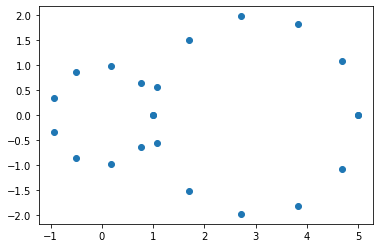

In [2]:
def generate_circles():
    phi_values = np.linspace(0, 2*np.pi, 10)
    small_circle = [[np.cos(phi), np.sin(phi)] for phi in phi_values]
    phi_values = np.linspace(0, 2*np.pi, 12)
    large_circle = [[3 + 2*np.cos(phi), 2*np.sin(phi)] for phi in phi_values]
    
    return np.array(small_circle + large_circle)
    
point_data = generate_circles()
plt.scatter(point_data[:,0], point_data[:,1])

In [13]:
point_data.shape

(22, 2)

In [3]:
s=qtda.DataFiltration(data=point_data,max_dimension=2,max_edge_length=50).get_filtration_states()

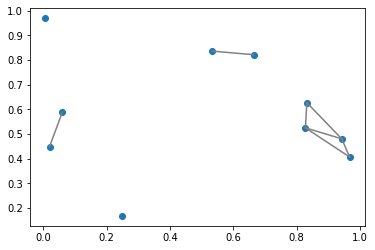

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def create_vietoris_rips(points, epsilon, k):
    # Calculate the pairwise distances between points
    distances = squareform(pdist(points))
    
    # Create a dictionary to hold the simplices
    simplices = {i: [] for i in range(k+1)}
    
    # Add the 0-simplices (points) to the simplicial complex
    for i in range(len(points)):
        simplices[0].append((i,))
    
    # Add the higher-dimensional simplices to the simplicial complex
    for dim in range(1, k+1):
        for indices in itertools.combinations(range(len(points)), dim+1):
            # Check if the pairwise distances between all combinations of points
            # in the simplex are less than epsilon
            if all(distances[i][j] < epsilon for i, j in itertools.combinations(indices, 2)):
                simplices[dim].append(indices)
    
    return simplices

# Example usage
m=10
points = np.random.rand(m,2) # 10 random 2D points
epsilon = 0.25 # maximum distance between points for an edge to be included
k = 2 # maximum simplex dimension
simplices = create_vietoris_rips(points, epsilon, k)


# Visualize the points and edges in the complex

plt.scatter(points[:,0], points[:,1])
for edge in simplices[1]:
    x = [points[i][0] for i in edge]
    y = [points[i][1] for i in edge]
    plt.plot(x, y, color='gray', linestyle='-')
plt.show()

In [24]:
s={0:[],1:[],2:[],3:[]}
points
m=points.shape[0]
for keys in simplices:
  for vals in simplices[keys]:
    f=m*"0"
    f= list(map(int,f))
    for i in vals:
      f[i]=1
    s[keys].append(tuple(f))

In [25]:
print(s)

{0: [(1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 1, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1)], 1: [(0, 1, 1, 0, 0, 0, 0, 0, 0, 0), (0, 1, 0, 1, 0, 0, 0, 0, 0, 0), (0, 1, 0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 1, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1)], 2: [(0, 1, 1, 1, 0, 0, 0, 0, 0, 0), (0, 1, 0, 1, 1, 0, 0, 0, 0, 0)], 3: []}


In [ ]:
n_vertices = m # number of qubits to represent the simplicial complex
num_eval_qubits = 5 # number of numerical evaluation qubits for the QPE algorithm
k = 0 # order of the combinatorial Laplacian
qc = qtda.QTDAalgorithm(num_eval_qubits, k, s)
qc.draw()

In [ ]:
qc.add_register(ClassicalRegister(num_eval_qubits)) #add classical register to measure evaluation qubits
for q in qc.eval_qubits:
    qc.measure(q,q)

shots = 1000
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
counts = job.result().get_counts(qc)

In [ ]:
dim = len(s[1]) # dimension of 1-simplex space
prob = counts.get("0"*num_eval_qubits)/shots # probability of eigenvalue 0

print('The number of 1-holes is', dim * prob)
plot_histogram(counts)